In [1]:
from pymor.basic import *
from pymor.core.logger import set_log_levels
set_log_levels({'pymor.algorithms.greedy': 'ERROR', 'pymor.algorithms.gram_schmidt.gram_schmidt': 'ERROR', 'pymor.algorithms.image.estimate_image_hierarchical': 'ERROR'})

In [2]:
p = thermal_block_problem(num_blocks=(3, 2))

In [3]:
fom, fom_data = discretize_stationary_cg(p, diameter=1./50.)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [4]:
print(fom_data['grid'])

Tria-Grid on domain [0,1] x [0,1]
x0-intervals: 50, x1-intervals: 50
elements: 10000, edges: 15100, vertices: 5101


Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

<pymor.discretizers.builtin.gui.jupyter.patch.visualize_patch.<locals>.Plot at 0x7f0e5c402190>

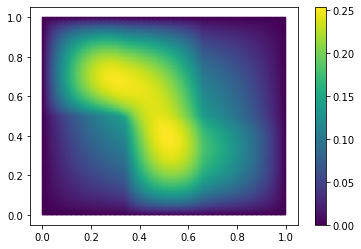

In [5]:
U = fom.solve([1.0, 0.1, 0.3, 0.1, 0.2, 1.0])
fom.visualize(U, title='Solution')

In [6]:
print(fom.parameters)

{diffusion: 6}


In [7]:
reductor = CoerciveRBReductor(
    fom,
    product=fom.h1_0_semi_product,
    coercivity_estimator=ExpressionParameterFunctional('min(diffusion)', fom.parameters)
)

In [8]:
training_set = p.parameter_space.sample_uniformly(4)
print(training_set[0])

{diffusion: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}


In [9]:
greedy_data = rb_greedy(fom, reductor, training_set, max_extensions=32)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

In [10]:
print(greedy_data.keys())

dict_keys(['max_errs', 'max_err_mus', 'extensions', 'time', 'rom'])


In [11]:
rom = greedy_data['rom']

In [12]:
RB = reductor.bases['RB']
print(type(RB))
print(len(RB))
print(RB.dim)

<class 'pymor.vectorarrays.numpy.NumpyVectorArray'>
32
5101


In [13]:
import numpy as np
gram_matrix = RB.gramian(fom.h1_0_semi_product)
print(np.max(np.abs(gram_matrix - np.eye(32))))

2.4302825377131576e-14


In [14]:
u = rom.solve([1.0, 0.1, 0.3, 0.1, 0.2, 1.0])
print(u)
U_red = reductor.reconstruct(u)
print(U_red.dim)

[[ 0.56008169  0.19410562  0.00463453  0.01675562  0.04900982  0.07760119
  -0.08043888 -0.02889488 -0.03121126  0.26467367  0.13991773 -0.09805741
   0.16005484  0.04417512 -0.05245844 -0.00132281 -0.01304436  0.01330245
  -0.02185056  0.00625769 -0.00868736 -0.00115484  0.01895446 -0.00153234
   0.02306277  0.0035532   0.01061803 -0.00225572  0.00199581 -0.0068476
   0.00186538  0.0047302 ]]
5101


[0.00480011]


<pymor.discretizers.builtin.gui.jupyter.patch.visualize_patch.<locals>.Plot at 0x7f0e5b6dea10>

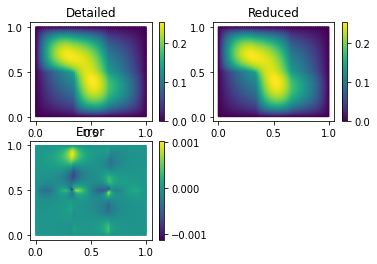

In [15]:
ERR = U - U_red
print(ERR.norm(fom.h1_0_semi_product))
fom.visualize((U, U_red, ERR),
              legend=('Detailed', 'Reduced', 'Error'),
              separate_colorbars=True)